In [40]:
import pandas as pd
from pylab import plot, show, legend, boxplot
import seaborn as sns
from pylab import title, xlabel, ylabel, axis, savefig, tight_layout, hist, boxplot
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer

In [41]:
df = pd.read_csv('income2 (1) z dodatkowym modelem.csv', sep = ';')

In [42]:
df_age = pd.read_csv('20_50.csv', sep = ';')

In [43]:
df_age0 = pd.read_csv('age_e0.csv', sep = ';')

In [44]:
df_age0

,age,wage_per_hour
0,42,1215
1,26,650
2,25,847
3,39,1005
4,43,600
...,...,...
977,47,700
978,32,900
979,40,400
980,43,800


In [45]:
df1 = df.drop(columns = ['industry_code', 'occupation_code', 'enrolled_in_edu_inst_lastwk'])

In [46]:
df1

,age,class_of_worker,education,edu_non_grad,edu_hs_grad,edu_uni_col_uni_grad,edu_prof_or_phd_grad,wage_per_hour,marital_status,major_industry_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,15,Private,0,1,0,0,0,435,0,Private household services,...,United-States,United-States,United-States,Native- Born in the United States,0,0t in universe,2,52,95,0
1,15,Private,0,1,0,0,0,300,0,Retail trade,...,United-States,United-States,United-States,Native- Born in the United States,0,0t in universe,2,52,95,0
2,15,Private,0,1,0,0,0,200,0,Private household services,...,United-States,United-States,United-States,Native- Born in the United States,0,0t in universe,2,50,95,0
3,15,Private,0,1,0,0,0,500,0,Retail trade,...,NaN,United-States,NaN,Native- Born abroad of American Parent(s),0,0t in universe,2,52,94,0
4,15,Private,0,1,0,0,0,425,0,Retail trade,...,United-States,United-States,United-States,Native- Born in the United States,0,0t in universe,2,52,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,90,Federal government,1,0,1,0,0,945,1,Public administration,...,United-States,United-States,United-States,Native- Born in the United States,0,0t in universe,2,0,95,0
11175,90,Private,0,1,0,0,0,735,1,Manufacturing-nondurable goods,...,South Korea,South Korea,South Korea,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,94,0
11176,90,Private,1,0,1,0,0,1000,1,Manufacturing-0ndurable goods,...,United-States,United-States,United-States,Native- Born in the United States,0,0t in universe,2,52,95,1
11177,90,Private,0,1,0,0,0,735,1,Manufacturing-nondurable goods,...,South Korea,South Korea,South Korea,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,0


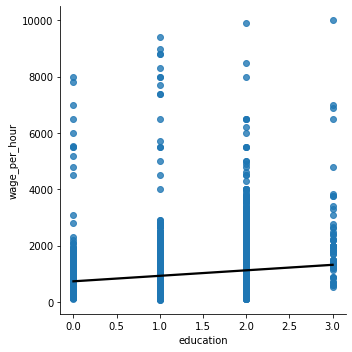

In [47]:
sns.lmplot(x='education', y='wage_per_hour', data=df,  line_kws = {'color' : 'black'})
show()

In [48]:
df1['lwage'] = np.log(df1['wage_per_hour'])

In [49]:
y = df1['lwage']
X = df1['education']

X = sm.add_constant(X)

In [50]:
model5 = sm.OLS(y,X).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     873.3
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          7.14e-185
Time:                        21:10:14   Log-Likelihood:                -8031.2
No. Observations:               11179   AIC:                         1.607e+04
Df Residuals:                   11177   BIC:                         1.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5074      0.009    698.985      0.000       6.489       6.526
education      0.1868      0.006     29.552      0.000       0.174       0.199
==============================================================================
Omnibus:                      401.034   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              739.577
Skew:                           0.285   Prob(JB):                    2.53e-161
Kurtosis:                       4.124   Cond. No.                         4.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

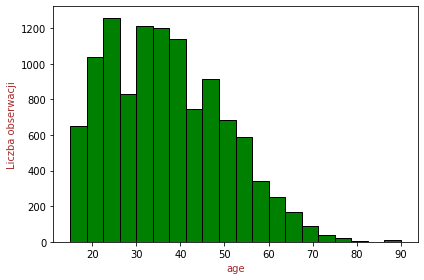

In [51]:
hist(df1.age, bins = 20, color = 'green', edgecolor = 'black')
xlabel('age', color = 'brown')
ylabel('Liczba obserwacji', color = 'brown')
tight_layout()
show()

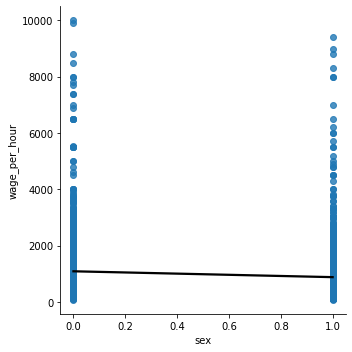

In [52]:
sns.lmplot(x='sex', y='wage_per_hour', data=df1,  line_kws = {'color' : 'black'})
show()

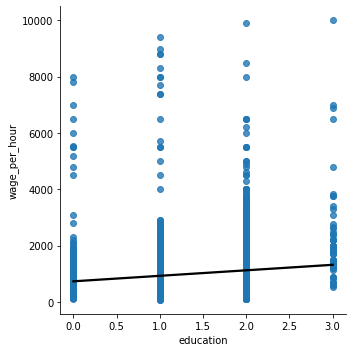

In [53]:
sns.lmplot(x='education', y='wage_per_hour', data=df1,  line_kws = {'color' : 'black'})
show()

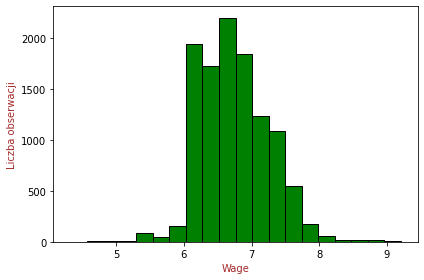

In [54]:
hist(df1.lwage, bins = 20, color = 'green', edgecolor = 'black')
xlabel('Wage', color = 'brown')
ylabel('Liczba obserwacji', color = 'brown')
tight_layout()
show()

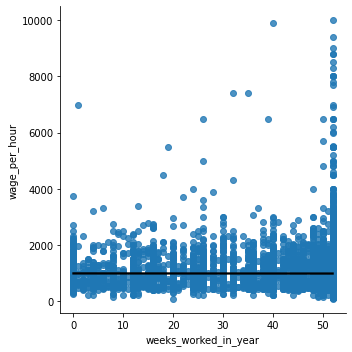

In [55]:
sns.lmplot(x='weeks_worked_in_year', y='wage_per_hour', data=df1,  line_kws = {'color' : 'black'})
show()

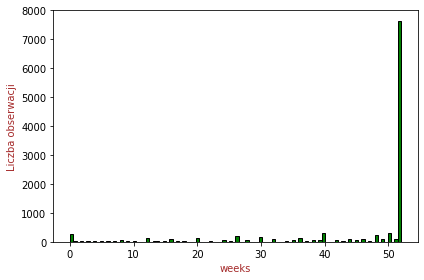

In [56]:
hist(df1.weeks_worked_in_year, bins = 100, color = 'green', edgecolor = 'black')
xlabel('weeks', color = 'brown')
ylabel('Liczba obserwacji', color = 'brown')
tight_layout()
show()

In [57]:
df_age['lwage'] = np.log(df_age['wage_per_hour'])

In [58]:
y = df_age['lwage']
X = df_age['education']

X = sm.add_constant(X)

In [59]:
model = sm.OLS(y, X).fit()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     386.1
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           4.22e-84
Time:                        21:10:16   Log-Likelihood:                -5983.6
No. Observations:                8479   AIC:                         1.197e+04
Df Residuals:                    8477   BIC:                         1.199e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5772      0.012    554.194      0.000       6.554       6.600
education      0.1516      0.008     19.650      0.000       0.136       0.167
==============================================================================
Omnibus:                      265.980   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.006
Skew:                           0.221   Prob(JB):                    4.94e-116
Kurtosis:                       4.144   Cond. No.                         4.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
df_age0['lwage'] = np.log(df_age0['wage_per_hour'])

In [62]:
df1['ldividend']= np.log(df1['dividend_from_Stocks']+1)
df1['lgains']= np.log(df1['capital_gains']+1)
df1['sexXrace']=df1['sex']*df1['race']
df1['lgainsXldividend']=df1['lgains']*df1['ldividend']
df1['age_2']=df1['age']**2
df1['age_3']=df1['age']**3
df1['age_4']=df1['age']**4

In [63]:
y = df1['wage_per_hour']
X = df1[['sex','age','member_of_labor_union','marital_status','race','edu_non_grad','edu_hs_grad','edu_uni_col_uni_grad','edu_prof_or_phd_grad']]

X = sm.add_constant(X)

In [64]:
model_ladny=sm.OLS(y,X).fit()
model_ladny.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          wage_per_hour   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     303.6
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:10:16   Log-Likelihood:                -87072.
No. Observations:               11179   AIC:                         1.742e+05
Df Residuals:                   11170   BIC:                         1.742e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   798.6377     21.030     37.977      0.000     757.416     839.860
sex                    -188.6953     11.302    -16.696      0.000    -210.849    -166.542
age                       6.8058      0.456     14.910      0.000       5.911       7.701
member_of_labor_union   317.9468     15.101     21.055      0.000     288.346     347.547
marital_status          121.1021     12.005     10.087      0.000      97.569     144.635
race                    -49.7539     15.526     -3.205      0.001     -80.187     -19.320
edu_non_grad           -309.7518     19.066    -16.246      0.000    -347.125    -272.379
edu_hs_grad            -141.0417     17.689     -7.973      0.000    -175.716    -106.367
edu_uni_col_uni_grad     42.3311     17.453      2.425      0.015       8.120      76.542
edu_prof_or_phd_grad   1207.1002     62.284     19.380      0.000    1085.012    1329.189
==============================================================================
Omnibus:                    11651.486   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1254416.332
Skew:                           5.047   Prob(JB):                         0.00
Kurtosis:                      53.904   Cond. No.                     2.80e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
y = df_age['lwage']
X = df_age['age']

In [66]:
model_age0 = sm.OLS(y, X).fit()
model_age0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  lwage   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                          1.390e+05
Date:                Tue, 04 Jan 2022   Prob (F-statistic):                        0.00
Time:                        21:10:16   Log-Likelihood:                         -16181.
No. Observations:                8479   AIC:                                  3.236e+04
Df Residuals:                    8478   BIC:                                  3.237e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.1863      0.000    372.839      0.000       0.185       0.187
==============================================================================
Omnibus:                      285.535   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.501
Skew:                          -0.470   Prob(JB):                     5.09e-69
Kurtosis:                       3.074   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Race: white-0
black-1
Asian or pacific islander-3
Amer Indian Aleut or Eskimo -4

In [67]:
y = df1['lwage']
X = df1[['sex','age','age_2','marital_status','member_of_labor_union','race','ldividend','lgains','edu_non_grad','edu_hs_grad','edu_uni_col_uni_grad','edu_prof_or_phd_grad']]

X = sm.add_constant(X)

In [68]:
model_sex0 = sm.OLS(y, X).fit()
model_sex0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     471.0
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:10:17   Log-Likelihood:                -6321.3
No. Observations:               11179   AIC:                         1.267e+04
Df Residuals:                   11167   BIC:                         1.275e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.6713      0.028    165.659      0.000       4.616       4.727
sex                      -0.1855      0.008    -22.401      0.000      -0.202      -0.169
age                       0.0509      0.002     28.963      0.000       0.047       0.054
age_2                    -0.0005    2.1e-05    -25.760      0.000      -0.001      -0.001
marital_status            0.0685      0.009      7.517      0.000       0.051       0.086
member_of_labor_union     0.2817      0.011     25.401      0.000       0.260       0.303
race                     -0.0542      0.011     -4.765      0.000      -0.077      -0.032
ldividend                 0.0266      0.002     11.078      0.000       0.022       0.031
lgains                    0.0129      0.002      5.553      0.000       0.008       0.017
edu_non_grad              0.8435      0.015     58.061      0.000       0.815       0.872
edu_hs_grad               0.9827      0.014     68.078      0.000       0.954       1.011
edu_uni_col_uni_grad      1.1252      0.014     78.761      0.000       1.097       1.153
edu_prof_or_phd_grad      1.7199      0.046     37.389      0.000       1.630       1.810
==============================================================================
Omnibus:                      976.398   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4473.250
Skew:                           0.314   Prob(JB):                         0.00
Kurtosis:                       6.035   Cond. No.                     1.58e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.55e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


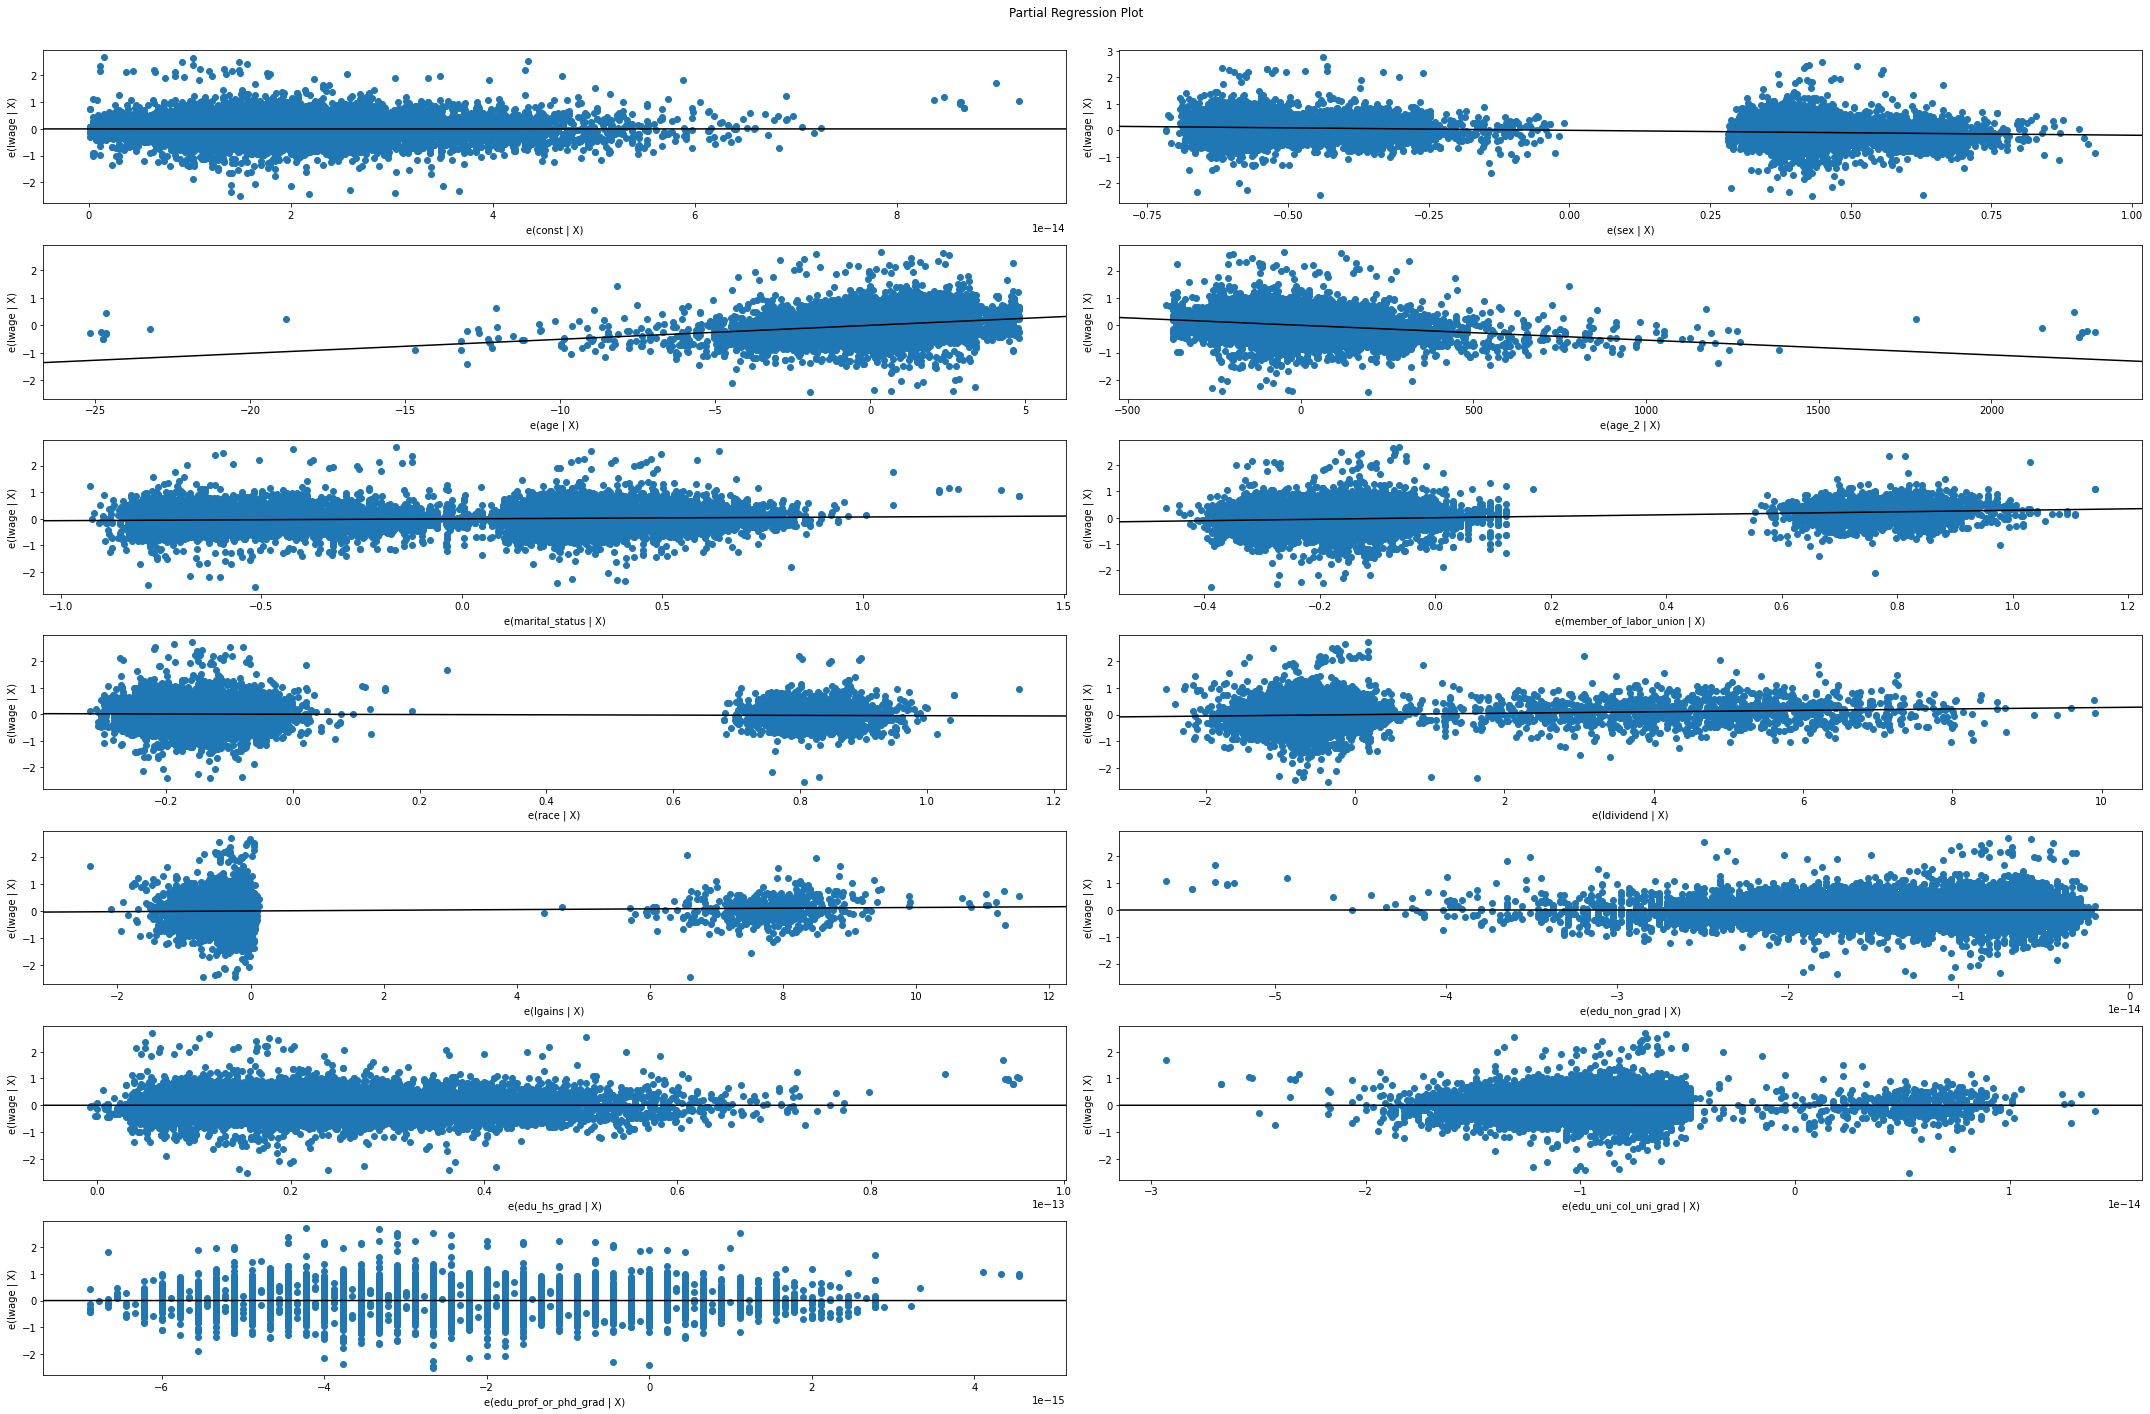

In [69]:
fig = plt.figure(figsize=(30,20))
sm.graphics.plot_partregress_grid(model_sex0,fig=fig)
savefig('partialregplot.jpg',dpi=240)
plt.show()

In [70]:
i = df1['wage_per_hour']
O  = df1[['sex','age','age_2','marital_status','member_of_labor_union','race','ldividend','lgains','edu_non_grad','edu_hs_grad','edu_uni_col_uni_grad','edu_prof_or_phd_grad']]

O = sm.add_constant(X)

In [71]:
model_sex6 = sm.OLS(i, O).fit()
model_sex6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          wage_per_hour   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     267.1
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:10:21   Log-Likelihood:                -86867.
No. Observations:               11179   AIC:                         1.738e+05
Df Residuals:                   11167   BIC:                         1.738e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   251.7472     37.962      6.632      0.000     177.335     326.159
sex                    -189.3771     11.150    -16.985      0.000    -211.233    -167.521
age                      45.7325      2.367     19.320      0.000      41.092      50.373
age_2                    -0.4849      0.028    -17.135      0.000      -0.540      -0.429
marital_status           59.1775     12.275      4.821      0.000      35.117      83.238
member_of_labor_union   285.6415     14.929     19.133      0.000     256.377     314.906
race                    -57.9373     15.318     -3.782      0.000     -87.963     -27.912
ldividend                34.0062      3.235     10.511      0.000      27.664      40.348
lgains                   15.2790      3.130      4.881      0.000       9.143      21.415
edu_non_grad           -381.0241     19.559    -19.481      0.000    -419.363    -342.686
edu_hs_grad            -273.3958     19.432    -14.069      0.000    -311.486    -235.305
edu_uni_col_uni_grad   -107.5275     19.233     -5.591      0.000    -145.227     -69.828
edu_prof_or_phd_grad   1013.6946     61.928     16.369      0.000     892.304    1135.085
==============================================================================
Omnibus:                    11978.583   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1438188.132
Skew:                           5.259   Prob(JB):                         0.00
Kurtosis:                      57.562   Cond. No.                     1.58e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.55e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
Stargazer([model_ladny,model_sex0,model_sex6,])

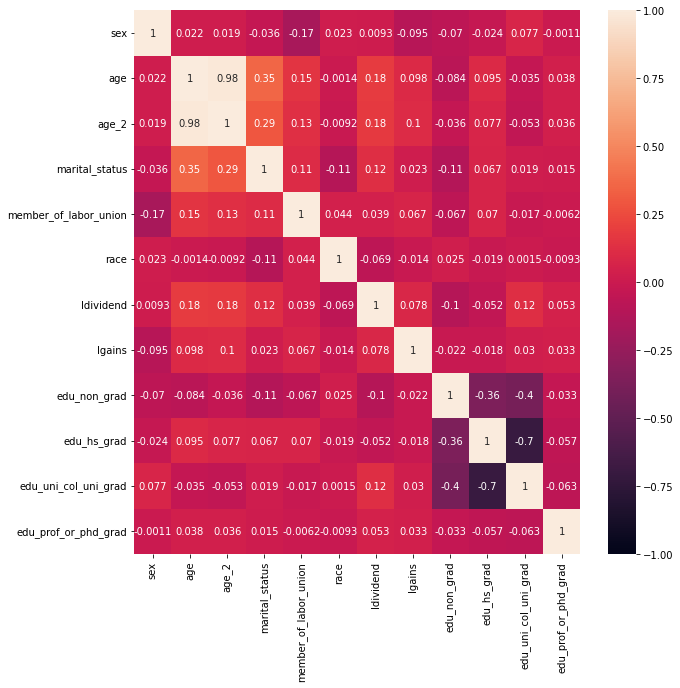

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(df1[['sex','age','age_2','marital_status','member_of_labor_union','race','ldividend','lgains','edu_non_grad','edu_hs_grad','edu_uni_col_uni_grad','edu_prof_or_phd_grad']]
.corr(method = 'pearson'), vmin = -1, vmax = 1, annot = True)
savefig('corelationbox.jpg',dpi=1000)
plt.show()

<Figure size 720x720 with 0 Axes>

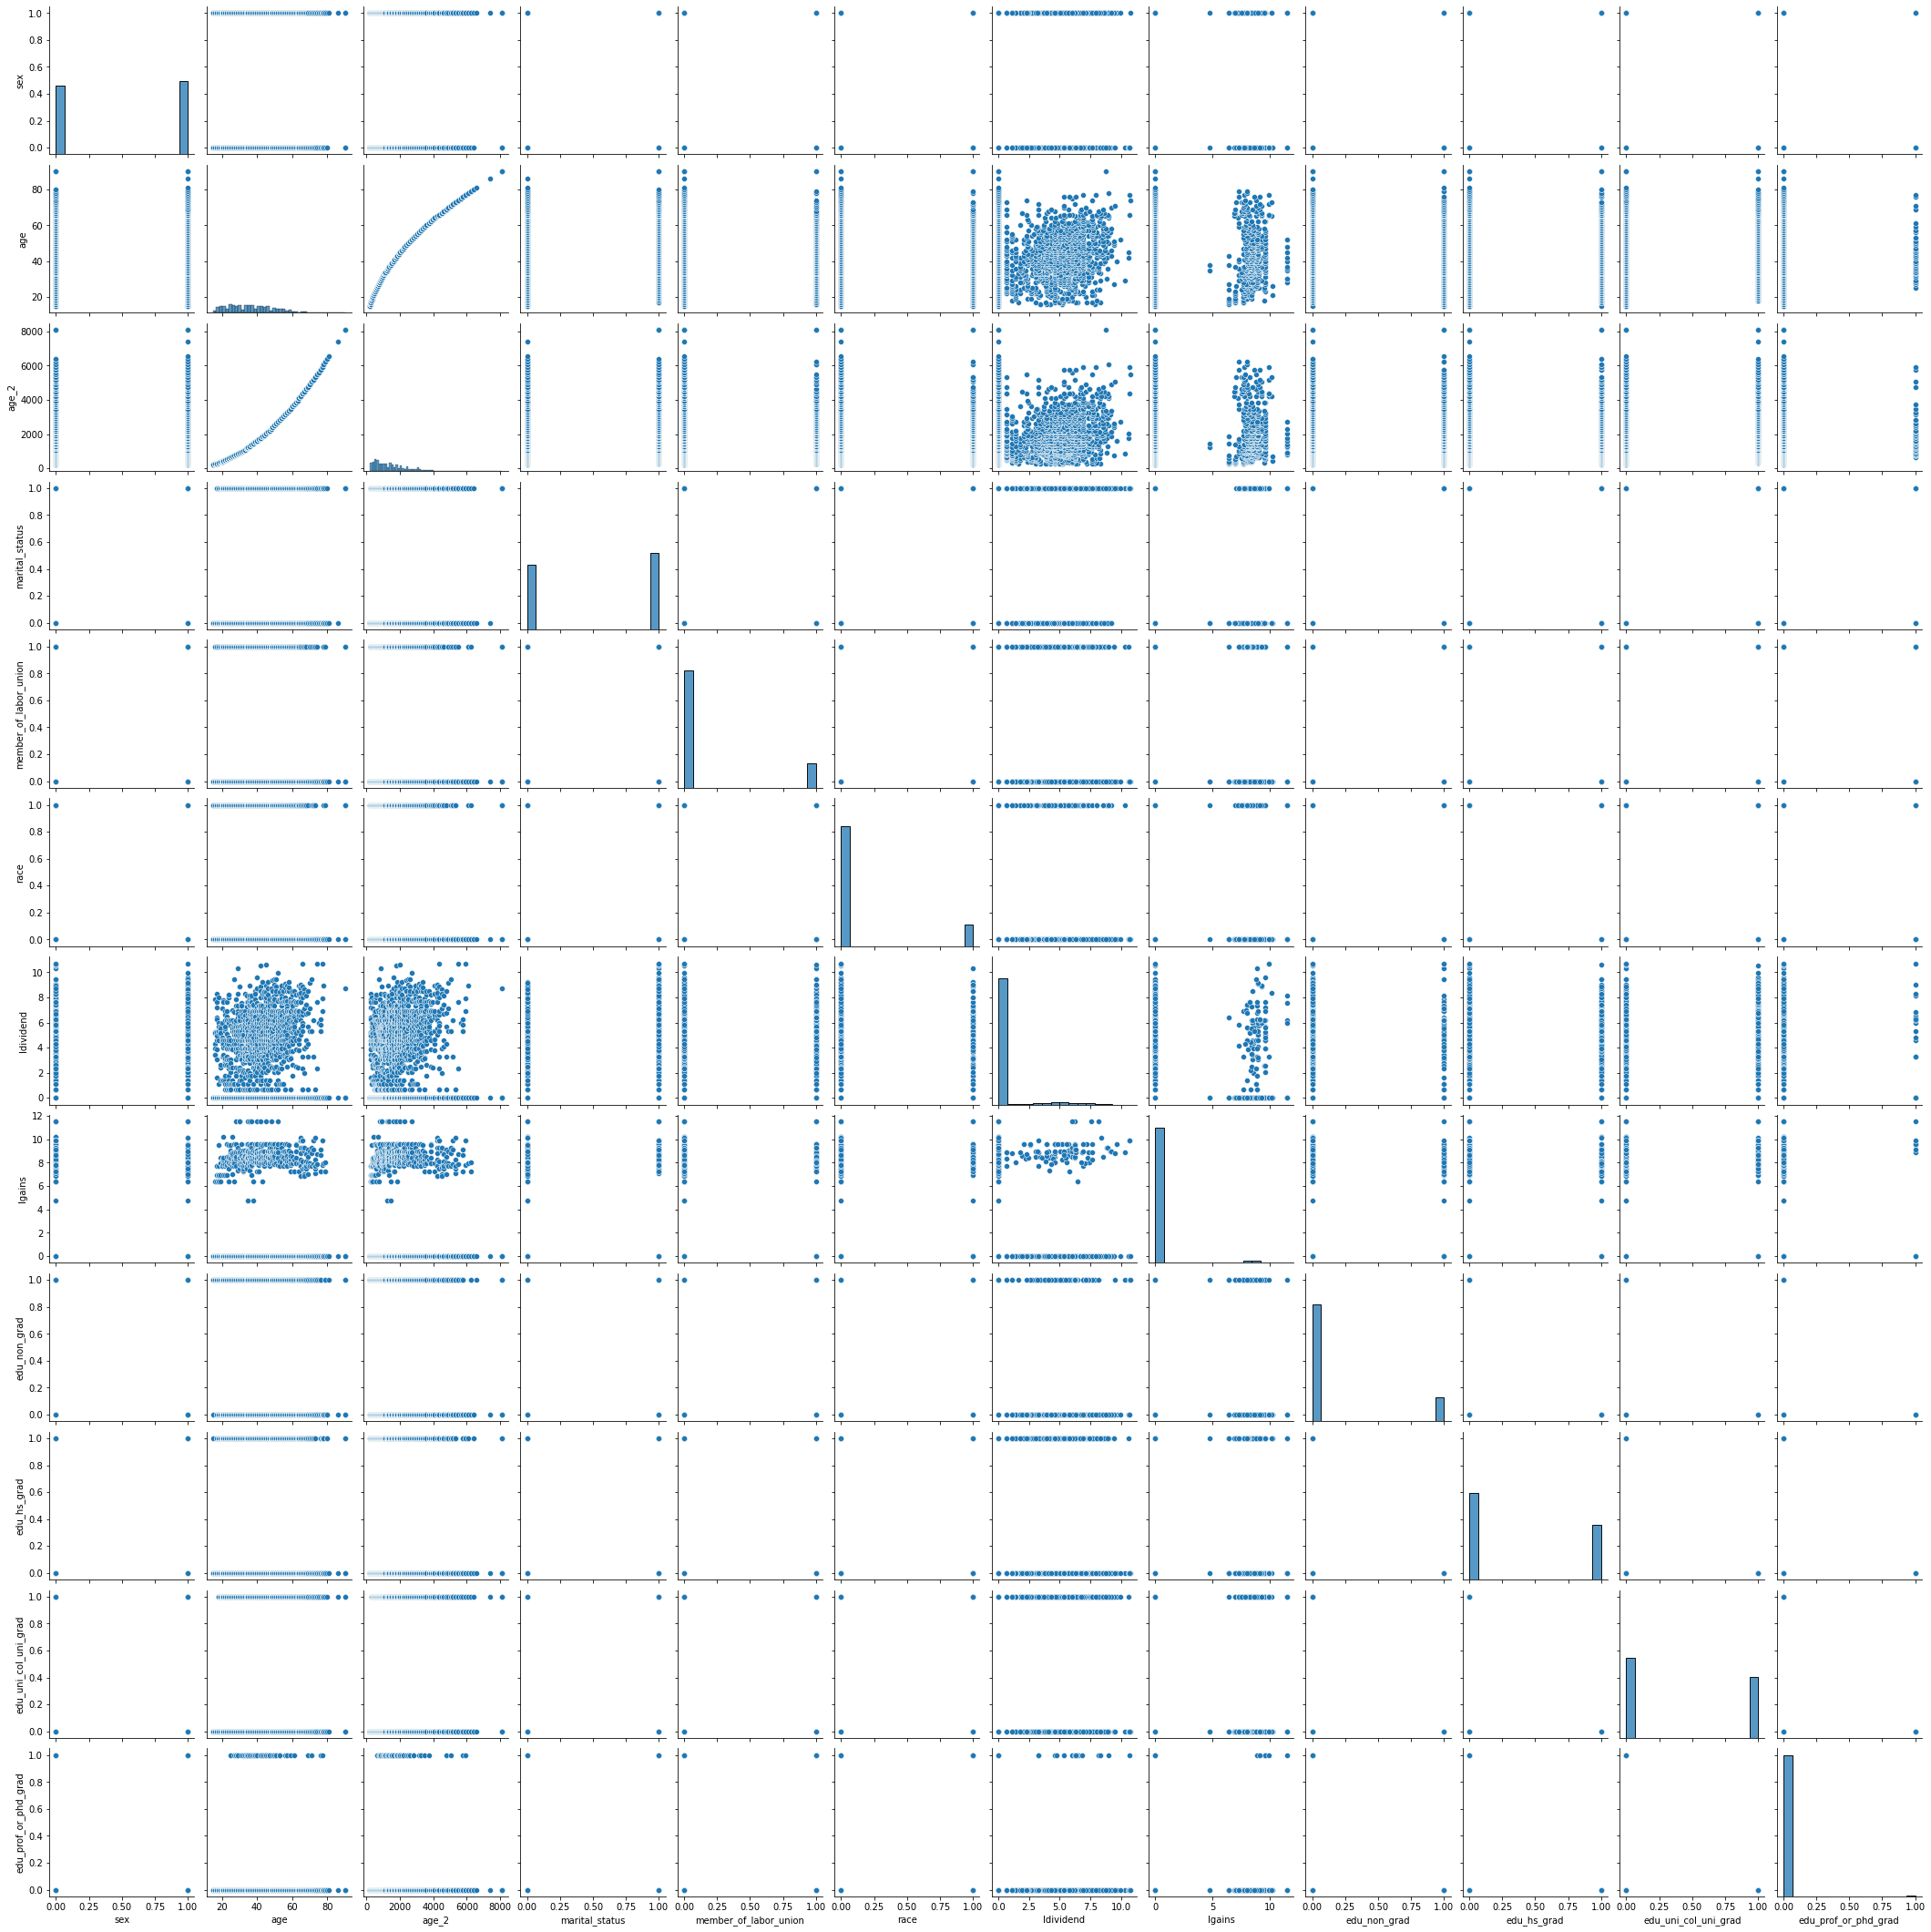

In [74]:
plt.figure(figsize=(10,10))
sns.pairplot(df1[['sex','age','age_2','marital_status','member_of_labor_union','race','ldividend','lgains','edu_non_grad','edu_hs_grad','edu_uni_col_uni_grad','edu_prof_or_phd_grad']])
savefig('pairplot.jpg',dpi=1000)
plt.show()